In [20]:
import os
import json
import subprocess
import numpy as np
from ipywidgets import interact

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

# Plotting
%matplotlib inline
plt.rcParams['font.size'] = 18.0
plt.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# For MB Pro retina display
%config InlineBackend.figure_format = 'retina'

# For auto-reloading external modules
%load_ext autoreload
%autoreload 2

import utils  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


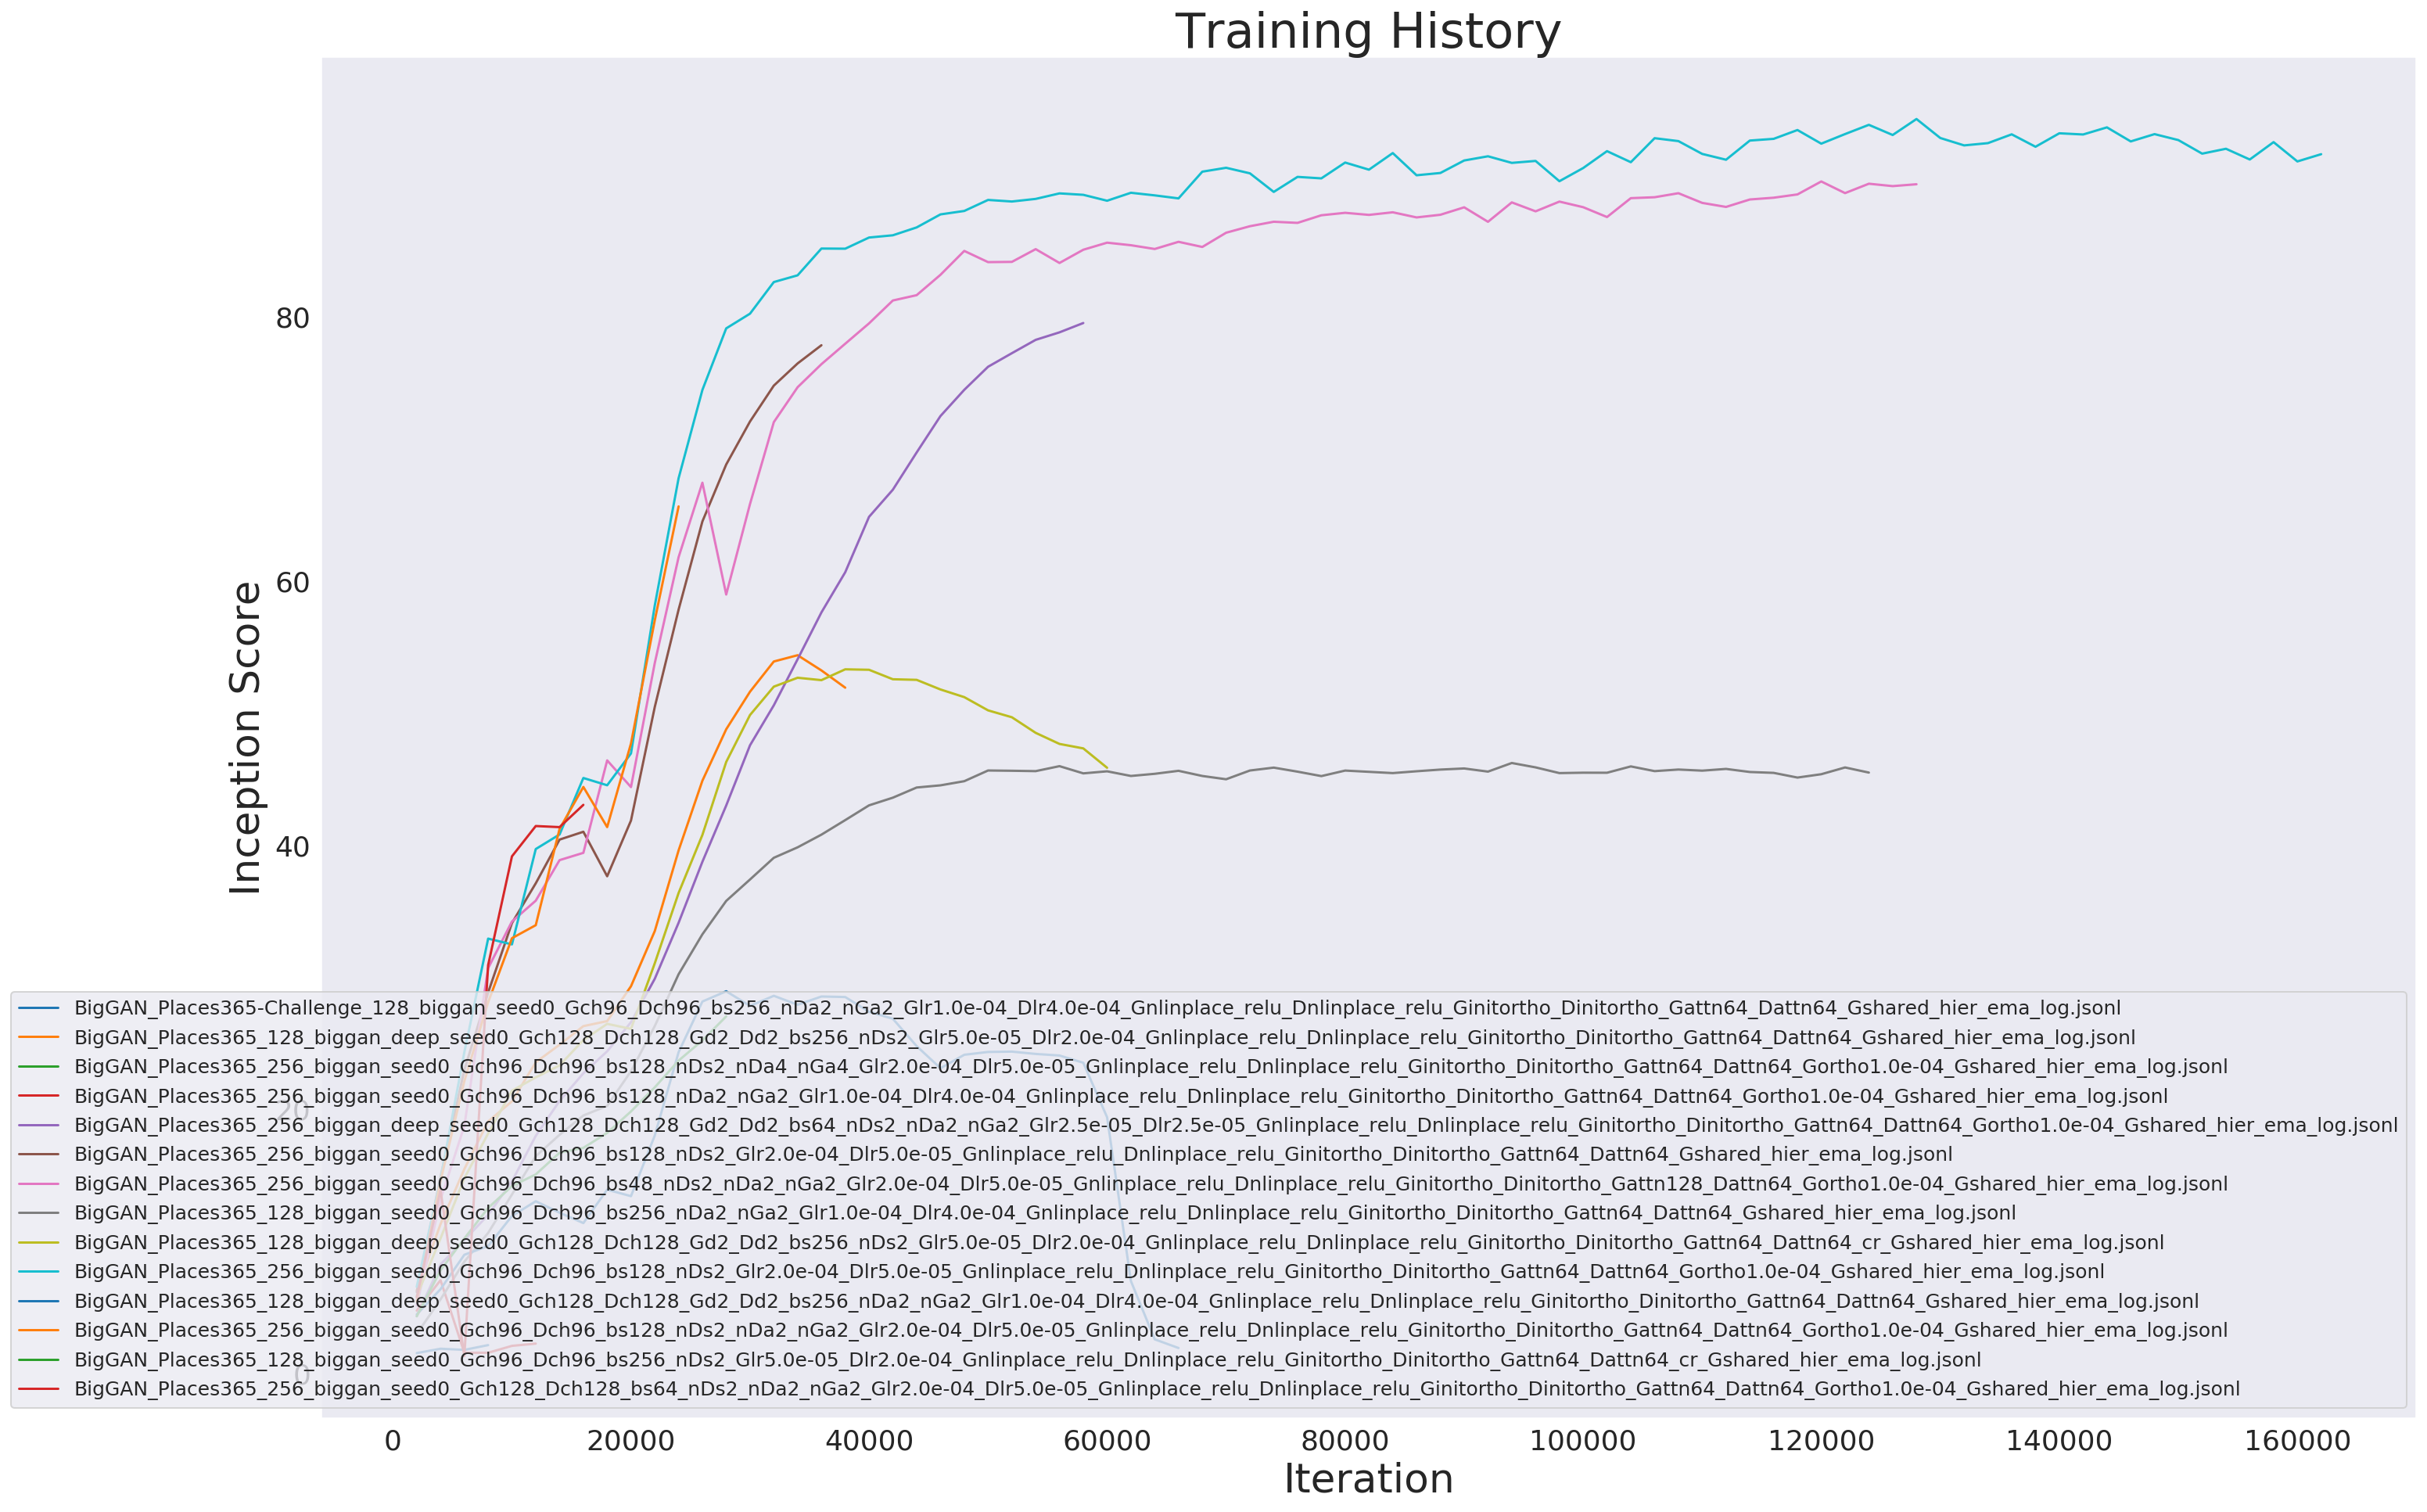

BigGAN_Places365-Challenge_128_biggan_seed0_Gch96_Dch96_bs256_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gshared_hier_ema_log.jsonl

BigGAN_Places365_128_biggan_deep_seed0_Gch128_Dch128_Gd2_Dd2_bs256_nDs2_Glr5.0e-05_Dlr2.0e-04_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gshared_hier_ema_log.jsonl

BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDs2_nDa4_nGa4_Glr2.0e-04_Dlr5.0e-05_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gortho1.0e-04_Gshared_hier_ema_log.jsonl

BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gortho1.0e-04_Gshared_hier_ema_log.jsonl

BigGAN_Places365_256_biggan_deep_seed0_Gch128_Dch128_Gd2_Dd2_bs64_nDs2_nDa2_nGa2_Glr2.5e-05_Dlr2.5e-05_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gortho1.0e-04_Gshared_hier_ema_log.jsonl

BigG

In [21]:
logs = utils.get_logs('logs')
utils.plot_logs(logs)
for name in logs:
    print(name + '\n')

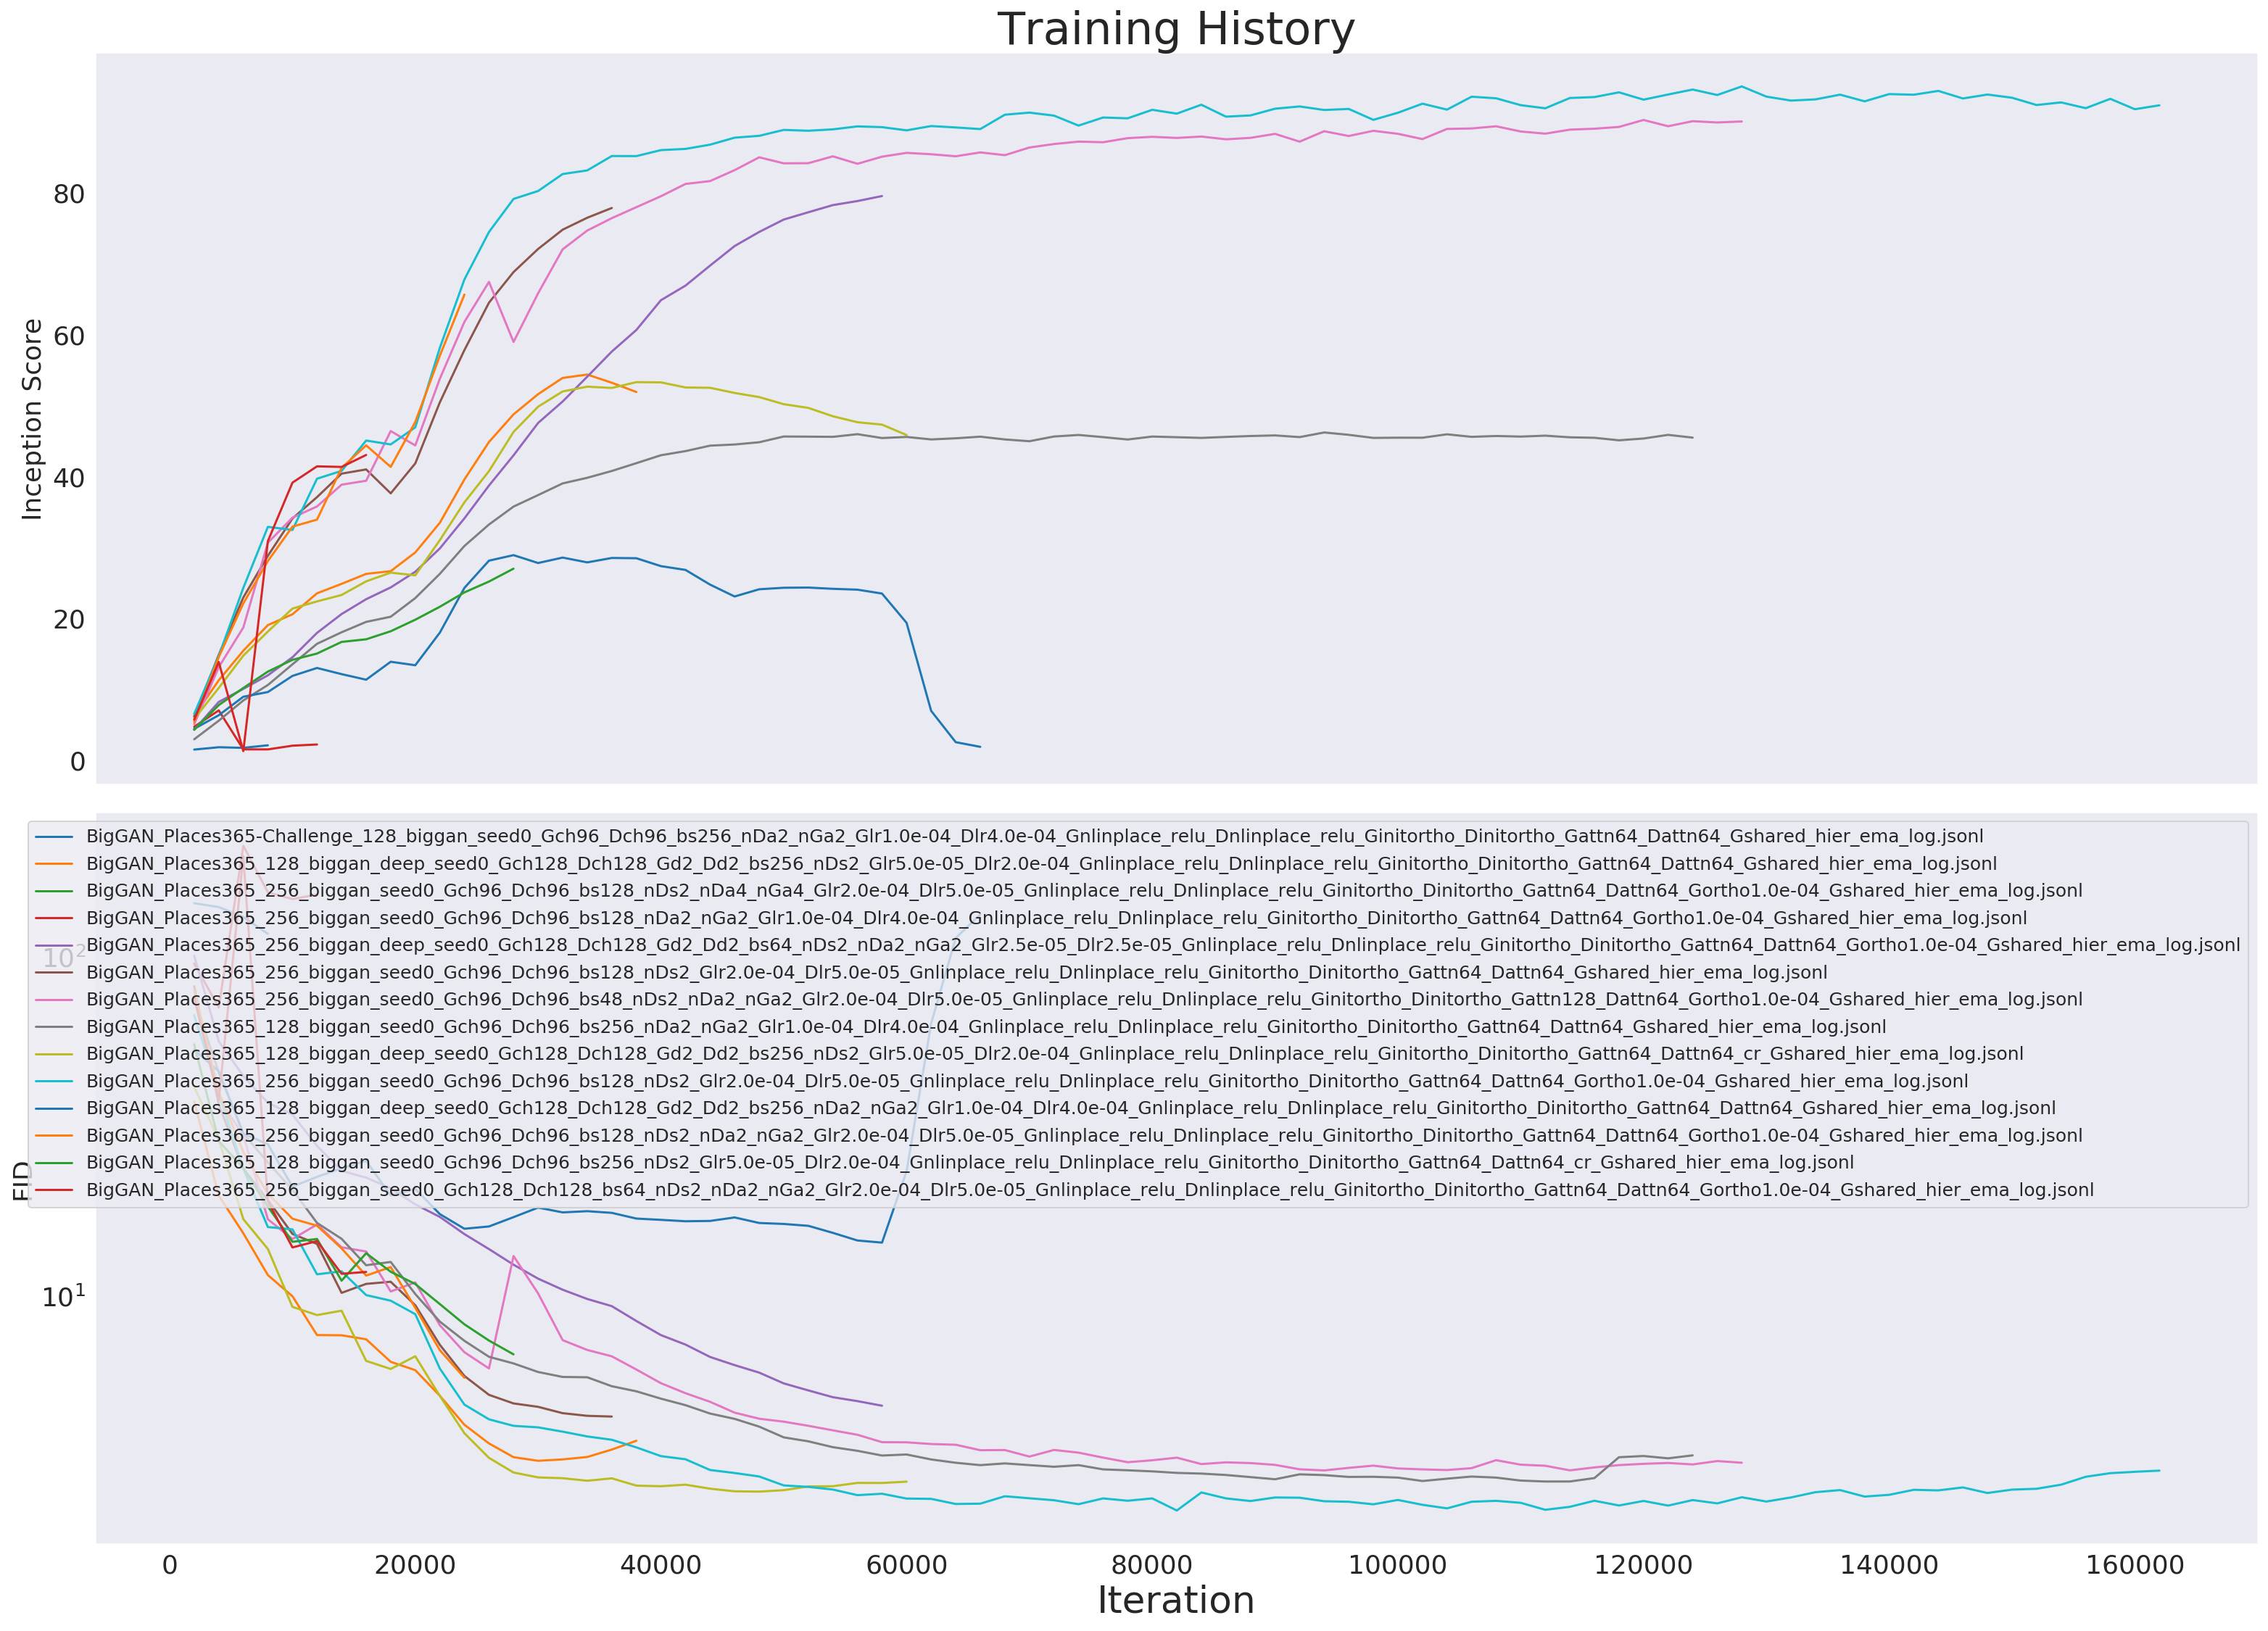

In [22]:
utils.plot_IS_FID(logs)

In [23]:
blacklist = [
#     'BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu',
    'BigGAN_Places365_128_biggan_seed0_Gch96_Dch96_bs256_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu',
    'BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDs2_nDa2_nGa2_Glr2.0e-04_Dlr5.0e-05_Gnlinplace_relu_Dnlinplace',
    'BigGAN_Places365_128_biggan_deep_seed0_Gch128_Dch128_Gd2_Dd2_bs256_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace',
]
utils.print_stats(logs, blacklist=blacklist)

BigGAN_Places365-Challenge_128_biggan_seed0_Gch96_Dch96_bs256_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu
	 current itr: 8000
	 current IS: 2.140
	 current FID: 116.767
	 max IS: 2.140 at itr (8000)
	 min FID: 116.767 at itr (8000)
BigGAN_Places365_128_biggan_deep_seed0_Gch128_Dch128_Gd2_Dd2_bs256_nDs2_Glr5.0e-05_Dlr2.0e-04_Gnlinplace_relu
	 current itr: 38000
	 current IS: 51.923
	 current FID: 3.745
	 max IS: 54.381 at itr (34000)
	 min FID: 3.269 at itr (30000)
BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDs2_nDa4_nGa4_Glr2.0e-04_Dlr5.0e-05_Gnlinplace_relu_Dnlinplace
	 current itr: 2000
	 current IS: 5.724
	 current FID: 79.319
	 max IS: 5.724 at itr (2000)
	 min FID: 79.319 at itr (2000)
BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu
	 current itr: 12000
	 current IS: 2.253
	 current FID: 152.368
	 max IS: 7.054 at itr (4000)
	 min FID: 70.841 at itr (4000)
BigGAN_Places365_256_biggan_d

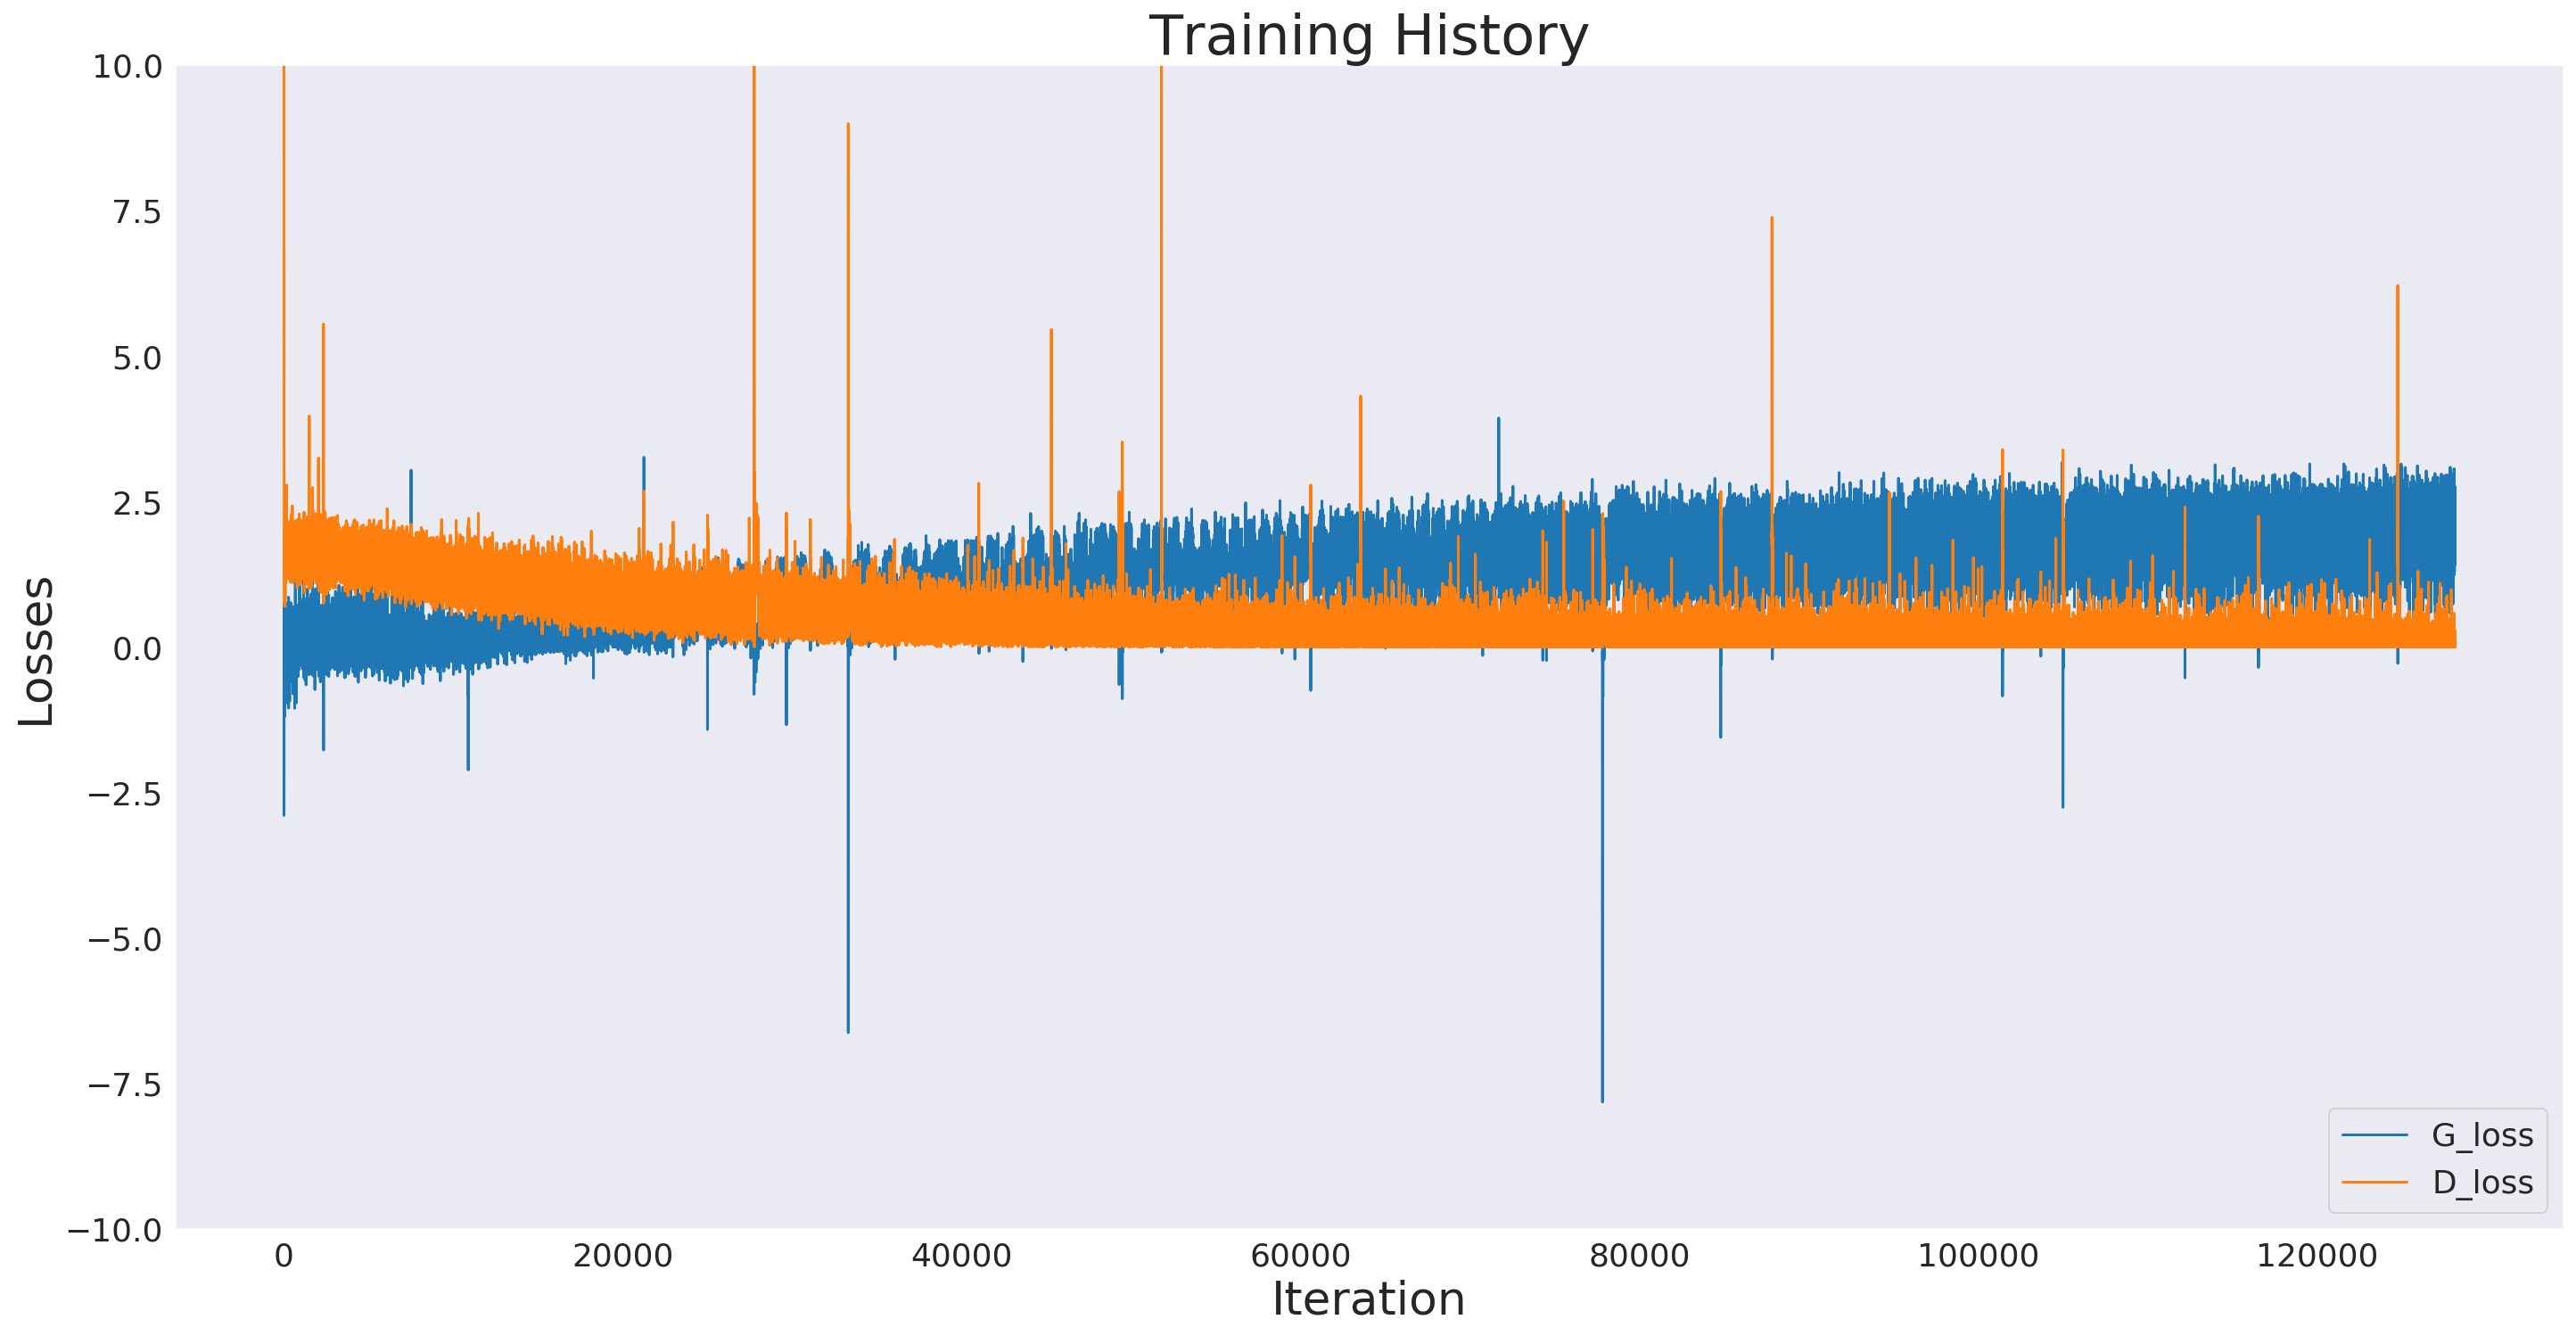

In [24]:
log_dir = 'logs/BigGAN_Places365_128_biggan_seed0_Gch96_Dch96_bs256_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gshared_hier_ema'
# log_dir = 'logs/BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDs2_nDa2_nGa2_Glr2.0e-04_Dlr5.0e-05_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gortho1.0e-04_Gshared_hier_ema'
log_dir = 'logs/BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs128_nDs2_Glr2.0e-04_Dlr5.0e-05_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gortho1.0e-04_Gshared_hier_ema'
log_dir = 'logs/BigGAN_Places365_256_biggan_seed0_Gch96_Dch96_bs48_nDs2_nDa2_nGa2_Glr2.0e-04_Dlr5.0e-05_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn128_Dattn64_Gortho1.0e-04_Gshared_hier_ema'
logs = utils.load_logs(log_dir)

utils.plot_loss_logs(logs['loss'], smoothing=0.000, figsize=(24, 12))

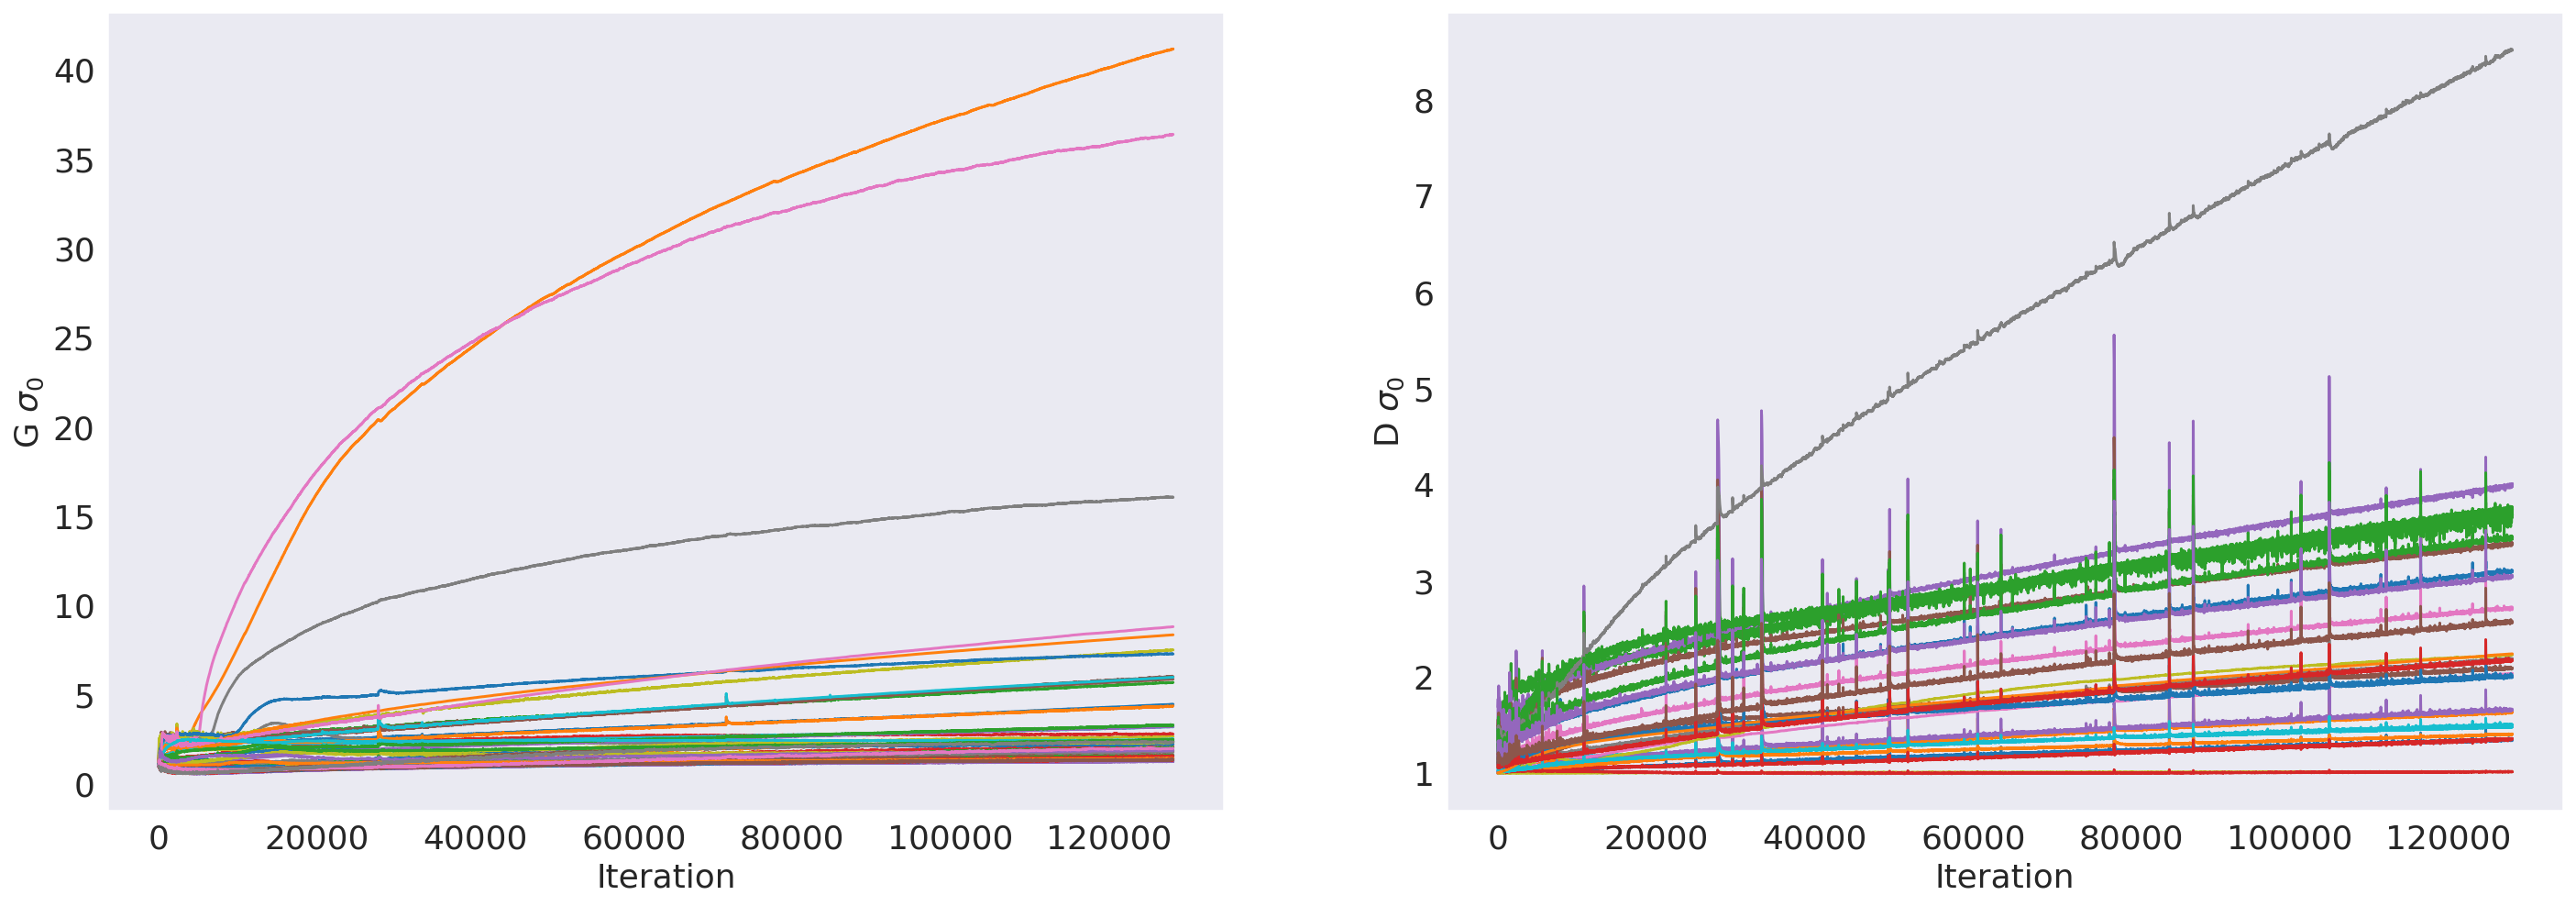

In [25]:
utils.plot_sv_logs(logs['sv'], figsize=(24,8))

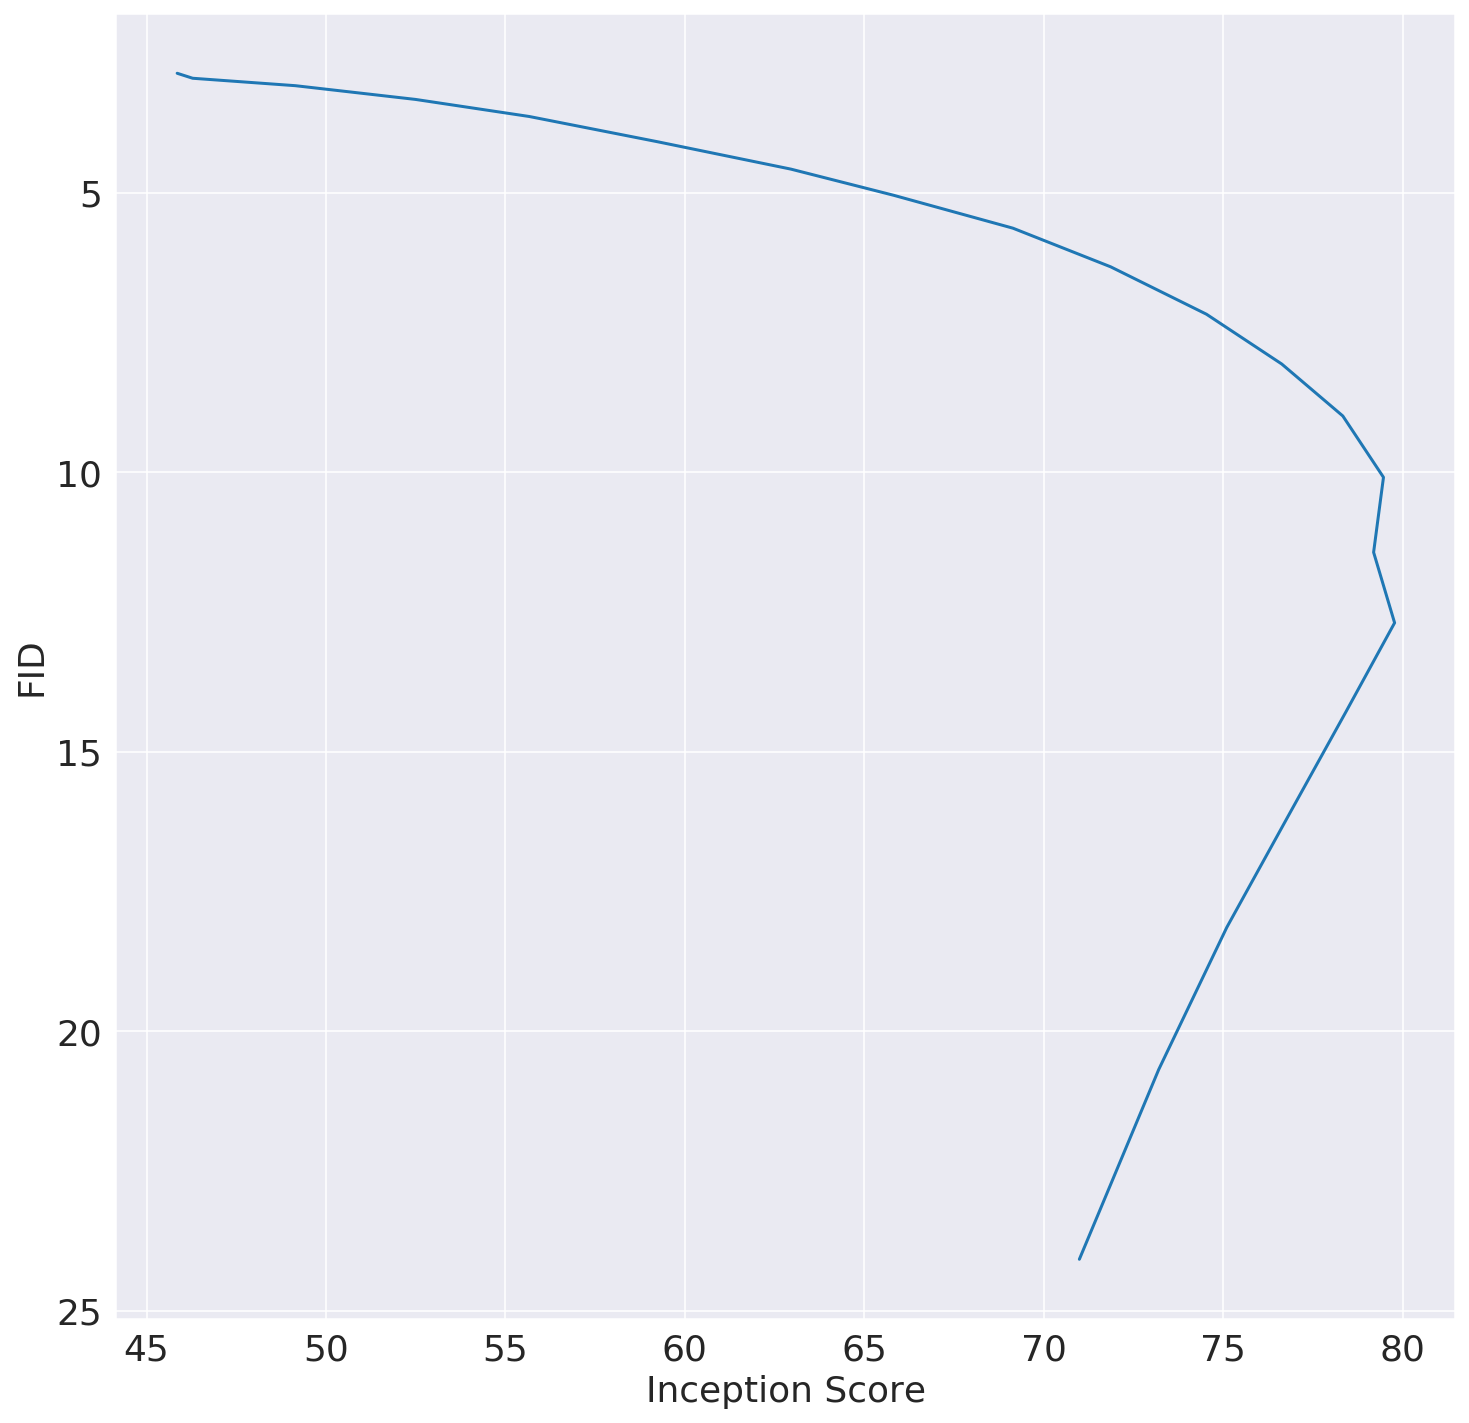

In [26]:
sns.set_style("darkgrid") 
plt.rcParams['figure.figsize'] = (12.0, 12.0)
trunc_file = 'samples/BigGAN_Places365_128_biggan_seed0_Gch96_Dch96_bs256_nDa2_nGa2_Glr1.0e-04_Dlr4.0e-04_Gnlinplace_relu_Dnlinplace_relu_Ginitortho_Dinitortho_Gattn64_Dattn64_Gshared_hier_ema/trunc_curves_98000.txt'
utils.plot_truncation_curves(trunc_file)
# @interact(smoothing=(0.0, 0.01, 0.0005))
# def plot_loss(smoothing=0):